In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/CSE151project/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [51]:
import os
os.makedirs('/root/.kaggle/', exist_ok=True)
!cp kaggle.json /root/.kaggle/
os.chmod('/root/.kaggle/kaggle.json', 600)

cp: cannot stat 'kaggle.json': No such file or directory


In [52]:
!kaggle competitions download -c nyc-taxi-trip-duration

nyc-taxi-trip-duration.zip: Skipping, found more recently modified local copy (use --force to force download)


In [53]:
!kaggle competitions download -c new-york-city-taxi-fare-prediction

new-york-city-taxi-fare-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip nyc-taxi-trip-duration.zip -d /content/taxi-trip-duration

Archive:  nyc-taxi-trip-duration.zip
replace /content/taxi-trip-duration/sample_submission.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip new-york-city-taxi-fare-prediction.zip -d /content/taxi-fare-prediction

In [ ]:
!unzip taxi-trip-duration/test.zip -d /content/taxi-trip-duration
!unzip taxi-trip-duration/train.zip -d /content/taxi-trip-duration

In [2]:
import pandas as pd
duration_train_data = pd.read_csv('taxi-trip-duration/train.csv')
duration_test_data = pd.read_csv('taxi-trip-duration/test.csv')
# fare_train_data = pd.read_csv('taxi-fare-prediction/train.csv')
# fare_test_data = pd.read_csv('taxi-fare-prediction/test.csv')

In [4]:
import pandas as pd
# fare_train_data = pd.read_csv('https://github.com/DaPhysikist/CSE151A_Taxi_Group/raw/refs/heads/main/fare_train_sampled.csv')
fare_train_data = pd.read_csv('fare_train_sampled.csv')

In [5]:
duration_train_data.shape

(1458644, 11)

In [6]:
duration_train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [7]:
fare_train_data.shape

(523856, 8)

In [8]:
fare_train_data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-30 10:20:09.0000005,14.1,2009-06-30 10:20:09 UTC,0.000000,0.000000,0.000000,0.000000,1
1,2009-08-18 10:45:49.0000004,6.1,2009-08-18 10:45:49 UTC,-73.924393,40.744035,-73.943658,40.746703,1
2,2012-04-29 21:47:07.0000002,13.7,2012-04-29 21:47:07 UTC,-73.950288,40.780055,-73.999023,40.730772,1
3,2014-05-04 08:35:00.00000056,6.5,2014-05-04 08:35:00 UTC,-73.990960,40.755957,-73.983815,40.761550,1
4,2009-01-16 09:24:46.0000002,4.1,2009-01-16 09:24:46 UTC,-73.990337,40.757461,-73.982659,40.766616,2


#Graphs
We graphed some of the data in order to be able to visualize some patterns in the data.

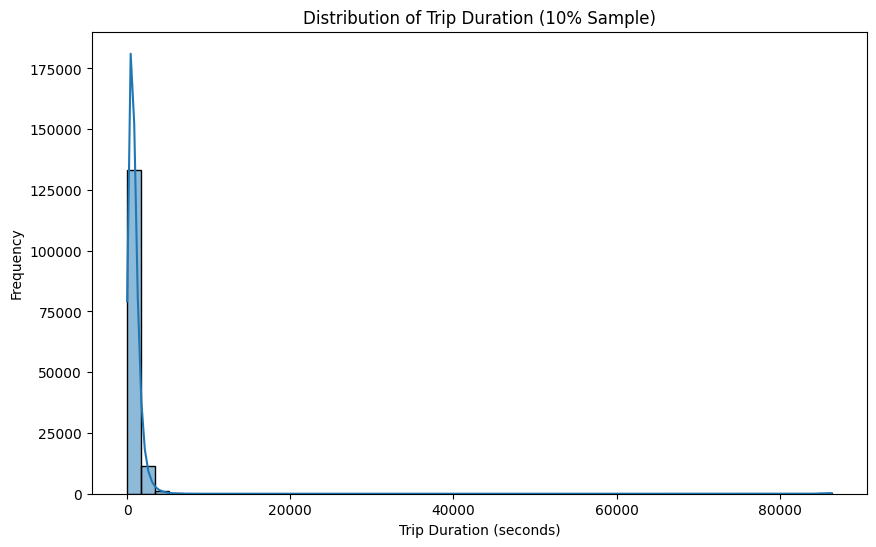

In [9]:
sampled_data = duration_train_data.sample(frac=0.1, random_state=42) # I took a random 10% of the data here so that it would be faster
# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(sampled_data['trip_duration'], bins=50, kde=True)
plt.title('Distribution of Trip Duration (10% Sample)')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

<Figure size 1200x800 with 0 Axes>

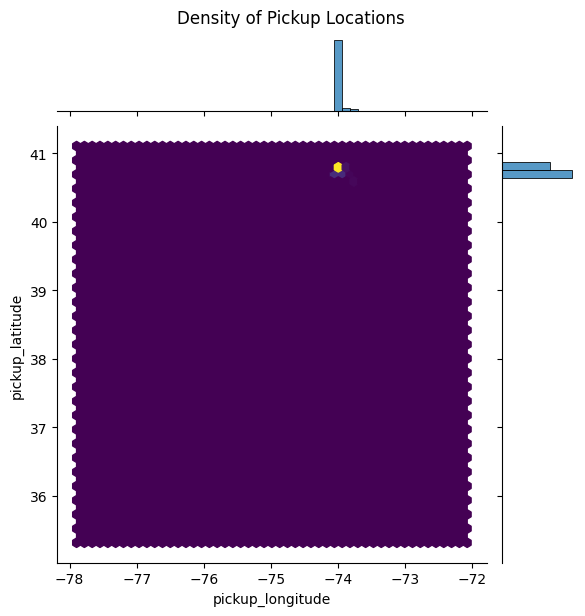

In [10]:
plt.figure(figsize=(12, 8))
sns.jointplot(
    x='pickup_longitude',
    y='pickup_latitude',
    data=sampled_data,
    kind='hex',
    gridsize=50,
    cmap='viridis',
    marginal_kws={'bins': 50, 'fill': True}
)
plt.suptitle('Density of Pickup Locations', y=1.02)
plt.show()

In [30]:
import folium
nyc_center = [40.7128, -74.0060]

nyc_map = folium.Map(location=nyc_center, zoom_start=12)

for _, row in sampled_data.iterrows():
    folium.CircleMarker(
        location=[row['pickup_latitude'], row['pickup_longitude']],
        radius=1,
        color='blue',
        fill=True,
        fill_opacity=0.4
    ).add_to(nyc_map)

for _, row in sampled_data.iterrows():
    folium.CircleMarker(
        location=[row['dropoff_latitude'], row['dropoff_longitude']],
        radius=1,
        color='red',
        fill=True,
        fill_opacity=0.4
    ).add_to(nyc_map)

# Save map to an HTML file and display it
nyc_map.save('nyc_pickup_dropoff_map.html')

This is the map generated to display the pickups and drop offs. The pick ups and blue and the drop offs are red:

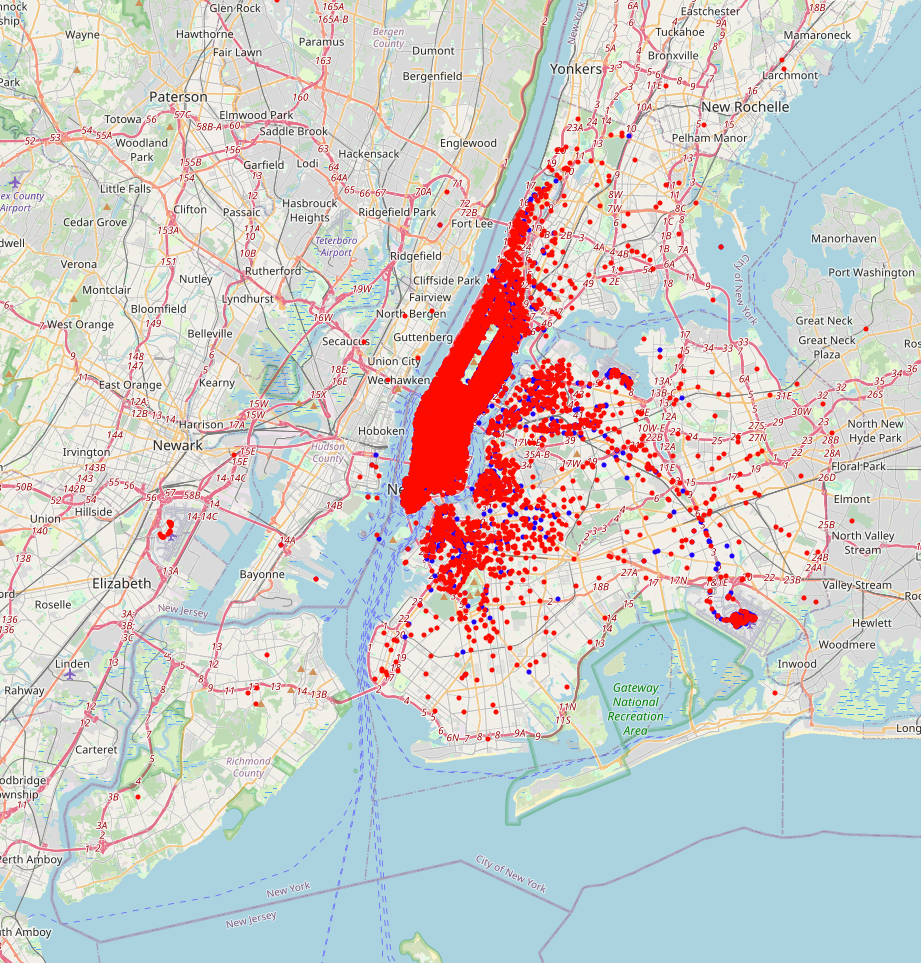

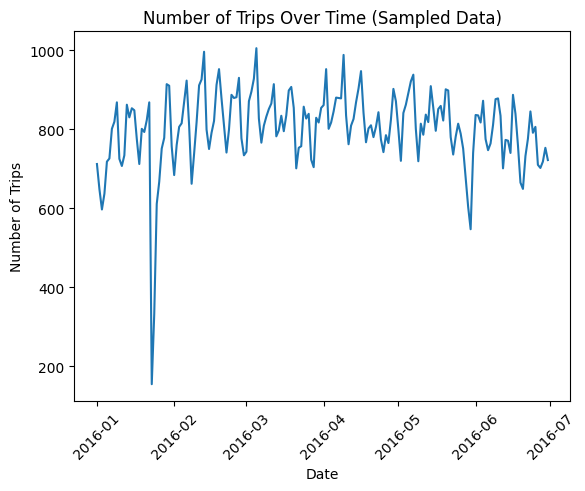

In [12]:
sampled_data['pickup_datetime'] = pd.to_datetime(sampled_data['pickup_datetime'], errors='coerce')

sampled_data = sampled_data.dropna(subset=['pickup_datetime'])

sampled_data['pickup_date'] = sampled_data['pickup_datetime'].dt.date

trips_per_day = sampled_data.groupby('pickup_date').size().reset_index(name='trip_count')

plt.figure()
sns.lineplot(x='pickup_date', y='trip_count', data=trips_per_day)
plt.title('Number of Trips Over Time (Sampled Data)')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()


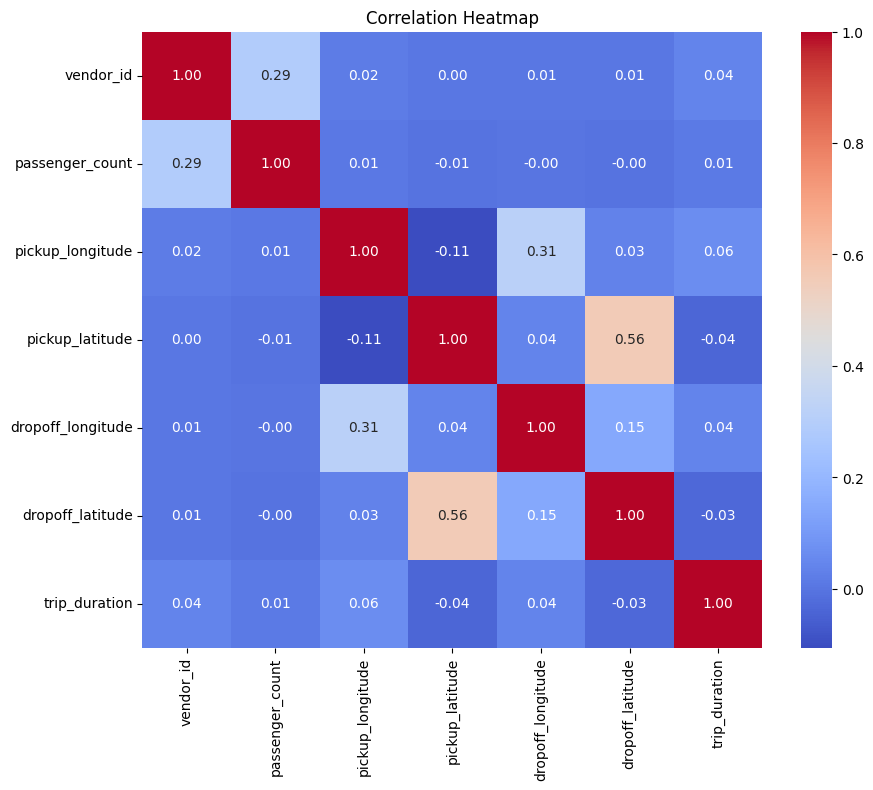

In [13]:
numeric_data = sampled_data.select_dtypes(include=['number'])

corr_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap shows that there is very little correlation between the pickup/dropoff locations and the duration of the trips. The only correlation which seems noticeable is the correlation between pickup/dropoff which makes sense since people would be taking cabs to close locations more often than not.

In [14]:
fare_train_data['pickup_datetime_ts'] = pd.to_datetime(fare_train_data['pickup_datetime']).view(np.int64) // 10**6

/var/folders/25/2_rtc8c92v389wfck_qkwkhm0000gn/T/ipykernel_21487/373647731.py:1: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  fare_train_data['pickup_datetime_ts'] = pd.to_datetime(fare_train_data['pickup_datetime']).view(np.int64) // 10**6


In [15]:
fare_train_data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_ts
count,523856.000000,523856.000000,523856.000000,523855.000000,523855.000000,523856.000000,5.238560e+05
mean,11.339418,-72.518767,39.926032,-72.518805,39.929630,1.685450,1.332370e+12
std,9.743934,12.254636,9.565386,11.952713,10.250126,1.308249,5.834320e+10
min,-23.300000,-2959.462187,-2541.548795,-2593.367637,-3115.274397,0.000000,1.230769e+12
25%,6.000000,-73.992120,40.734920,-73.991406,40.734034,1.000000,1.282251e+12
50%,8.500000,-73.981860,40.752654,-73.980200,40.753112,1.000000,1.332254e+12
75%,12.500000,-73.967113,40.767073,-73.963763,40.768071,2.000000,1.382177e+12
max,500.000000,1733.733772,3270.324030,1196.891612,3359.841550,9.000000,1.435708e+12


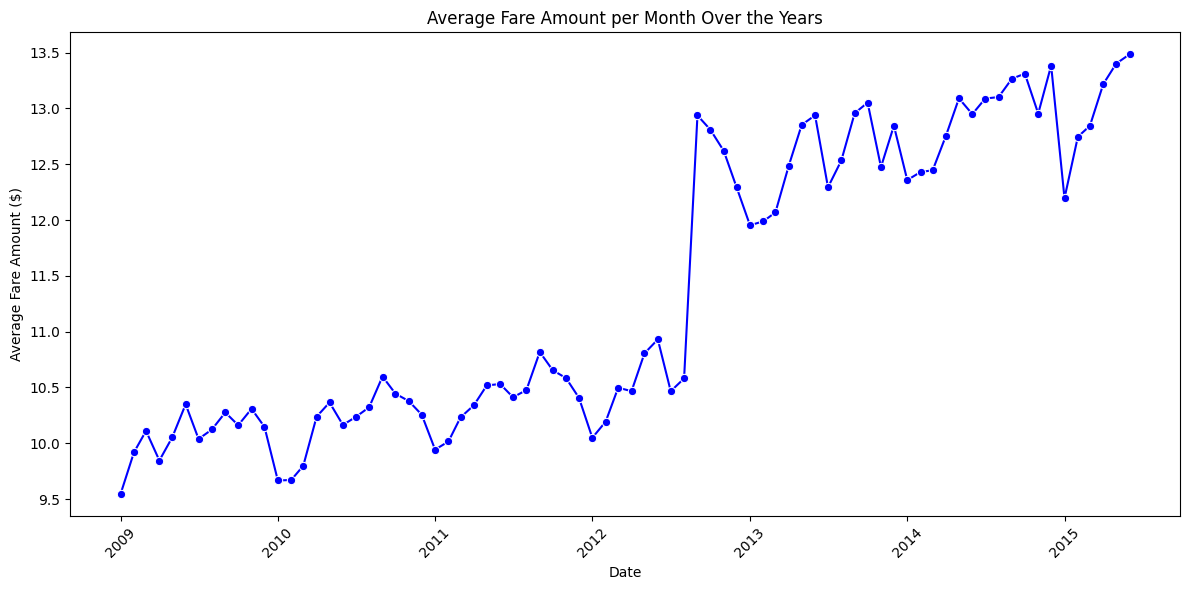

In [16]:
fare_train_data['pickup_datetime'] = pd.to_datetime(fare_train_data['pickup_datetime'])

fare_train_data['year'] = fare_train_data['pickup_datetime'].dt.year
fare_train_data['month'] = fare_train_data['pickup_datetime'].dt.month

monthly_avg = fare_train_data.groupby(['year', 'month'])['fare_amount'].mean().reset_index()

monthly_avg['date'] = pd.to_datetime(monthly_avg[['year', 'month']].assign(day=1))

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg, x='date', y='fare_amount', marker='o', color='b')

plt.xlabel("Date")
plt.ylabel("Average Fare Amount ($)")
plt.title("Average Fare Amount per Month Over the Years")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/25/2_rtc8c92v389wfck_qkwkhm0000gn/T/ipykernel_21487/76980757.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['distance_bins'] = pd.cut(filtered_data['distance'], bins=np.linspace(0, 50, 30))
/var/folders/25/2_rtc8c92v389wfck_qkwkhm0000gn/T/ipykernel_21487/76980757.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_fare_per_distance = filtered_data.groupby('distance_bins')['fare_amount'].mean().reset_index()


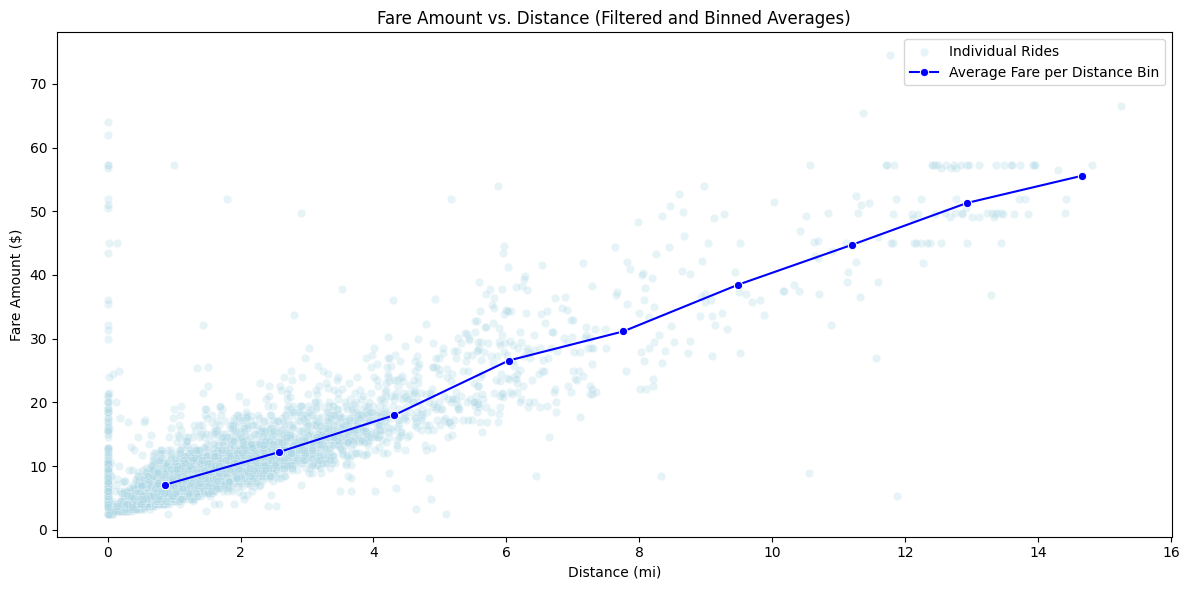

In [21]:
from math import radians, cos, sin, asin, sqrt

def get_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * asin(sqrt(a))

    # Radius of Earth in miles
    r = 3956
    return c * r

# Calculate the distance in miles for each row
sampled_fare_train_data = fare_train_data.sample(n=5000, random_state=42)
sampled_fare_train_data['distance'] = sampled_fare_train_data.apply(
    lambda row: get_distance(
        row['pickup_latitude'], row['pickup_longitude'],
        row['dropoff_latitude'], row['dropoff_longitude']
    ), axis=1
)

# Remove outliers (you can adjust the thresholds as needed)
filtered_data = sampled_fare_train_data[(sampled_fare_train_data['distance'] < 40) & (sampled_fare_train_data['fare_amount'] < 100)]

# Create distance bins and calculate the average fare amount for each bin
filtered_data['distance_bins'] = pd.cut(filtered_data['distance'], bins=np.linspace(0, 50, 30))
avg_fare_per_distance = filtered_data.groupby('distance_bins')['fare_amount'].mean().reset_index()
avg_fare_per_distance['distance'] = avg_fare_per_distance['distance_bins'].apply(lambda x: x.mid)

# Plotting
plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_data, x='distance', y='fare_amount', alpha=0.3, color='lightblue', label='Individual Rides')
sns.lineplot(data=avg_fare_per_distance, x='distance', y='fare_amount', color='blue', marker='o', label='Average Fare per Distance Bin')

plt.xlabel("Distance (mi)")
plt.ylabel("Fare Amount ($)")
plt.title("Fare Amount vs. Distance (Filtered and Binned Averages)")
plt.legend()
plt.tight_layout()
plt.show()

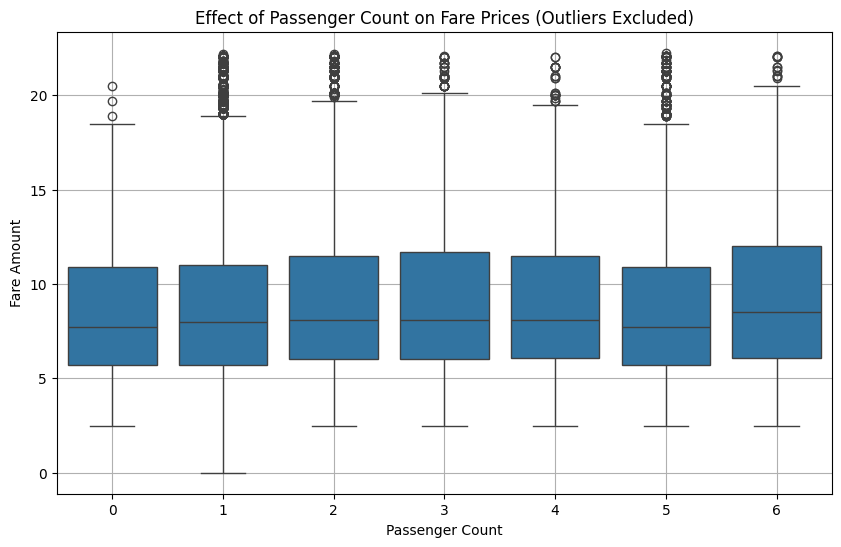

In [29]:
sampled_fare_train_data = fare_train_data.sample(frac=0.1, random_state=42)
Q1 = sampled_fare_train_data['fare_amount'].quantile(0.25)
Q3 = sampled_fare_train_data['fare_amount'].quantile(0.75)

lower_bound = Q1 - 1.5 * (Q3 - Q1)
upper_bound = Q3 + 1.5 * (Q3 - Q1)

# Filter the DataFrame to exclude outliers
filtered_sampled_fare_train_data = sampled_fare_train_data[(sampled_fare_train_data['fare_amount'] >= lower_bound) & (sampled_fare_train_data['fare_amount'] <= upper_bound)]

# Create a box plot with the filtered data
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_sampled_fare_train_data, x='passenger_count', y='fare_amount')
plt.title('Effect of Passenger Count on Fare Prices (Outliers Excluded)')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')
plt.grid()
plt.show()

#Preprocessing Steps
Our project involves combining two NYC-based taxi related datasets. The first dataset, which involves trip duration data, has around 1.4 million rows of data. The features of this dataset are:
```
id (string, unique identifier for each trip)
vendor_id (code indicating trip provider)
pickup_datetime (timestamp)
dropoff_datetime (string)
passenger_count (integer)
pickup_longitude (float)
pickup_latitude (float)
dropoff_longitude (float)
dropoff_latitude (float)
store_and_fwd_flag (string)
trip_duration (integer)
```

The second dataset revolves around trip fares, and has around 55 million rows of data. The features of this dataset are:

```
key (string, uniquely identifies each row)
pickup_datetime (timestamp)
pickup_longitude (float)
pickup_latitude (float)
dropoff_longitude (float)
dropoff_latitude (float)
passenger_count (integer)
fare_amount (float)
```

Our goal is to combine the two datasets so that we can use the features they have in common to predict both the fares *and* duration of a taxi trip.

First, we will need to clean up the the trip duration data by dropping the ```id, vendor_id, store_and_fwd_flag``` columns because there is no matching information in the trip fare dataset.

It should be noted that the fares dataset ends in 2015, while the durations dataset starts at 2016. To make predicting fares easier, so we don't have to worry about inflation, we will filter the data to only use trips that happened in 2014. We will also drop the ```key``` column from the trip fare database.

We are now left with two datasets with the same features, except one has a fare_amount column and one has a trip_duration column. Our next step is to append the fare_amount of a row from the *fares* dataset to the row of the *duration* dataset with the most similarity in terms of pickup and dropoff latitude/longitude and passenger_count.

There are several ways we could do this, such as calculating the distance between coordinates and picking the closest, or doing something along the lines of cosine similarity, or even more explicity making sure that passenger counts match before allowing a fare to be appended.

#Collaboration Section

In the code, we generated the nyc pickup map using ChatGPT. The prompt we used was: "Is there a way to plot pickup and drop off longitude and latitude on a map of nyc".

For the Fare Amount vs. Distance graph, we used ChatGPT to get the distance calculation, and the avg_fare_per_distance dataframe. We then added our own code to make the scatterplot.